In [43]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [44]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


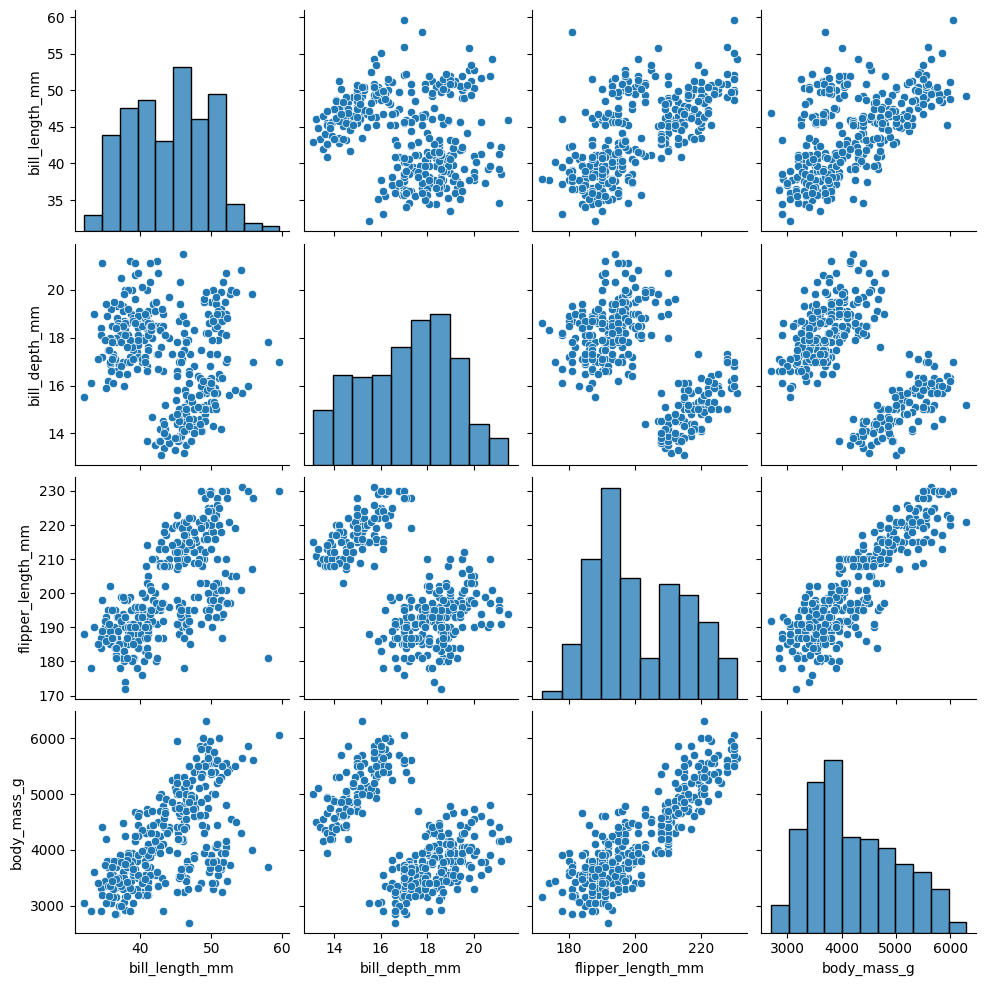

In [45]:
sns.pairplot(penguins)

In [46]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=43).fit(penguins[features])

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
penguins['cluster'] = km.predict(penguins[features])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0


In [48]:
penguins.cluster.value_counts()

1    203
0    130
Name: cluster, dtype: int64

In [49]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

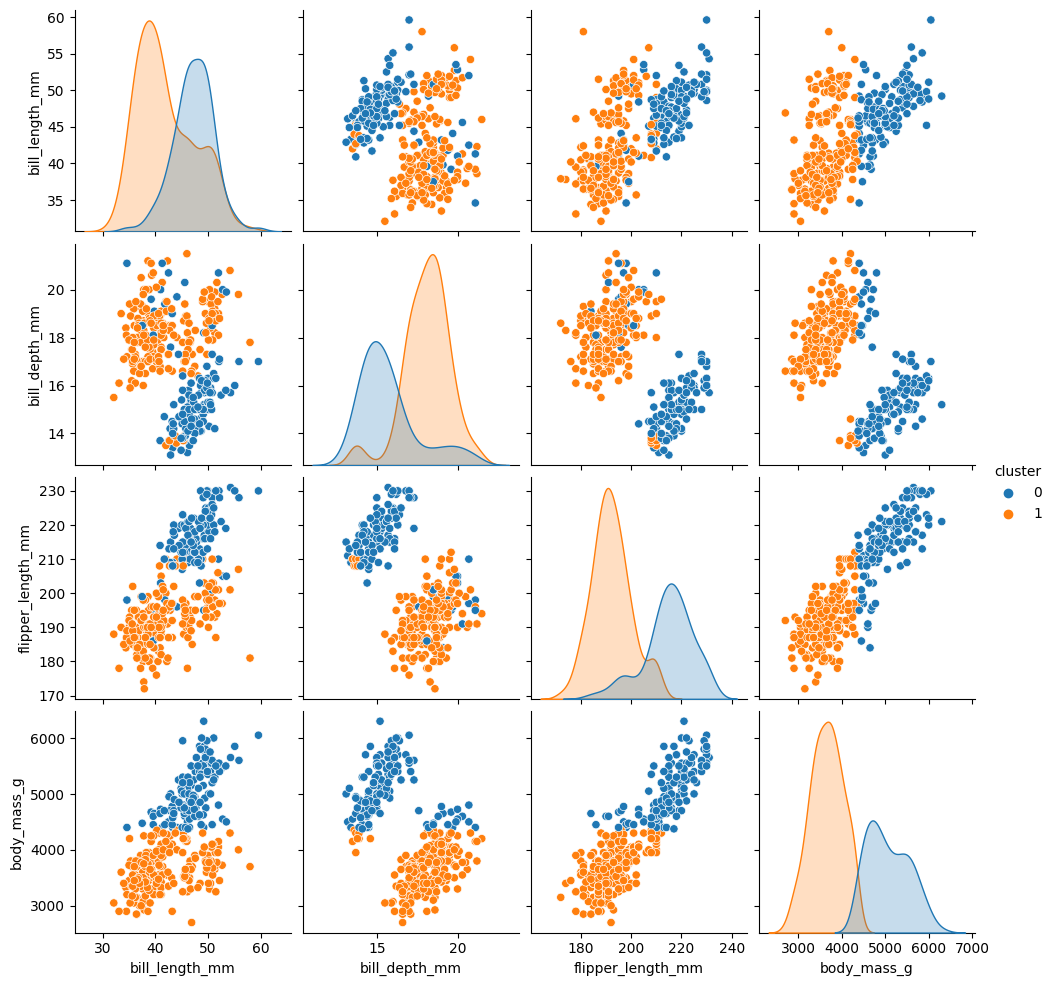

In [50]:
sns.pairplot(penguins, hue="cluster")
plt.show()

In [51]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,14,132
Chinstrap,5,63
Gentoo,111,8


Zoals in de contingency table getoond wordt zijn er twee clusters gevormd. In cluster 0 zitten grotendeels penguins van de soort Gentoo en in cluster 1 bevinden zich de meeste penguins van de soorten Adelie en Chinstrap. Dit betekent dat de eigenschappen van de soorten Adelie en Chinstrap meer op elkaar lijken.